# California Housing Price Prediction

#### DESCRIPTION

#### Background of Problem Statement :

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

#### Problem Objective :

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

#### Domain: Finance and Housing

#### Analysis Tasks to be performed:

1. Build a model of housing prices to predict median house values in California using the provided dataset.


2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.


3. Predict housing prices based on median_income and plot the regression chart for it.

-------------------------------------------------------------------------------------------------------------------------------

1. Load the data :

Read the “housing.csv” file from the folder into the program.

Print first few rows of this data.

Extract input (X) and output (Y) data from the dataset.

----------------------------------------------------------------------------------

2. Handle missing values :

Fill the missing values with the mean of the respective column.

----------------------------------------------------------------------------------

3. Encode categorical data :

Convert categorical column in the dataset to numerical data.

----------------------------------------------------------------------------------

4. Split the dataset : 

Split the data into 80% training dataset and 20% test dataset.

----------------------------------------------------------------------------------

5. Standardize data :

Standardize training and test datasets.

----------------------------------------------------------------------------------

6. Perform Linear Regression : 

Perform Linear Regression on training data.

Predict output for test dataset using the fitted model.

Print root mean squared error (RMSE) from Linear Regression.

----------------------------------------------------------------------------------

7. Perform Decision Tree Regression :

Perform Decision Tree Regression on training data.

Predict output for test dataset using the fitted model.

Print root mean squared error from Decision Tree Regression.

----------------------------------------------------------------------------------

8. Perform Random Forest Regression :

Perform Random Forest Regression on training data.

Predict output for test dataset using the fitted model.

Print RMSE (root mean squared error) from Random Forest Regression.

----------------------------------------------------------------------------------

9. Bonus exercise: Perform Linear Regression with one independent variable :

Extract just the median_income column from the independent variables (from X_train and X_test).

Perform Linear Regression to predict housing values based on median_income.

Predict output for test dataset using the fitted model.

Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_excel("housing.xlsx")

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [5]:
df.shape

(20640, 10)

In [6]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 1) Missing Value Treatment:

In [10]:
df.isna().sum() / len(df) * 100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64

In [11]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].mean())

In [12]:
df.isna().sum() / len(df) * 100

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
ocean_proximity       0.0
median_house_value    0.0
dtype: float64

### 2) Label Encoding:

In [13]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [14]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [15]:
# As this is Nominal Categorical Variable, we will Convert it into Dummy Variable.

In [16]:
df = pd.get_dummies(df, drop_first= True)

In [17]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,1,0


In [18]:
df.shape

(20640, 13)

### 3) Checking Distributions of Numerical Variables:

In [22]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

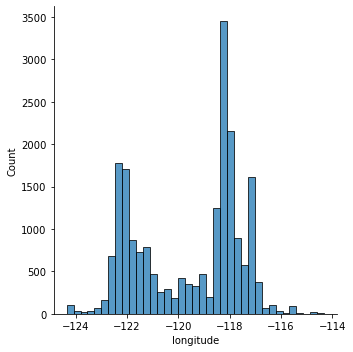

In [19]:
plt.figure(figsize= (6,4))

sns.displot(data= df, x= "longitude")

plt.show()

<Figure size 432x288 with 0 Axes>

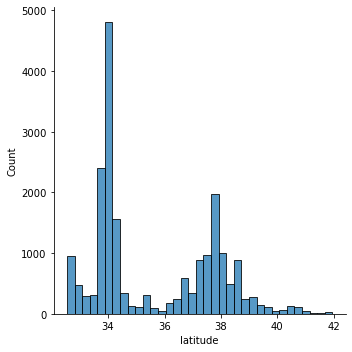

In [21]:
plt.figure(figsize= (6,4))

sns.displot(data= df, x= "latitude")

plt.show()

<Figure size 432x288 with 0 Axes>

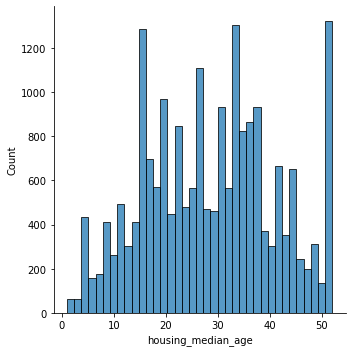

In [23]:
plt.figure(figsize= (6,4))

sns.displot(data= df, x= "housing_median_age")

plt.show()

<Figure size 432x288 with 0 Axes>

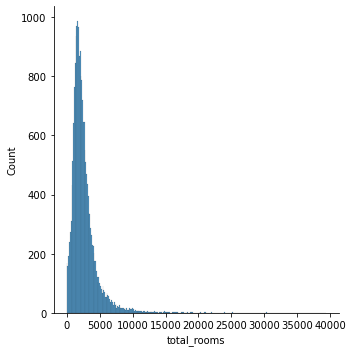

In [24]:
plt.figure(figsize= (6,4))

sns.displot(data= df, x= "total_rooms")

plt.show()

In [25]:
# Trying Log/ Square Root/ Cube Root Tranformation to Convert Distribution into Normal Distribution.

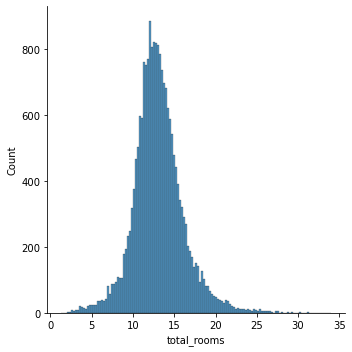

In [29]:
sns.displot(df["total_rooms"].apply(np.cbrt))

In [30]:
df["total_rooms"] = df["total_rooms"].apply(np.cbrt)

<Figure size 432x288 with 0 Axes>

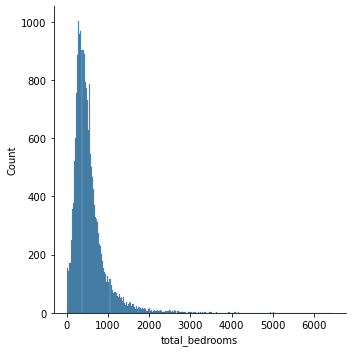

In [31]:
plt.figure(figsize= (6,4))

sns.displot(data= df, x= "total_bedrooms")

plt.show()

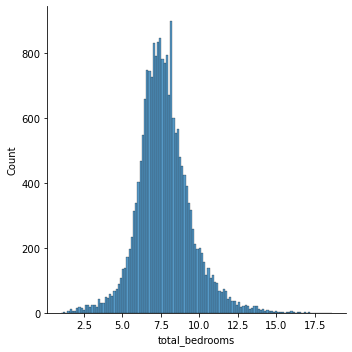

In [32]:
sns.displot(df["total_bedrooms"].apply(np.cbrt))

In [33]:
df["total_bedrooms"] = df["total_bedrooms"].apply(np.cbrt)

<Figure size 432x288 with 0 Axes>

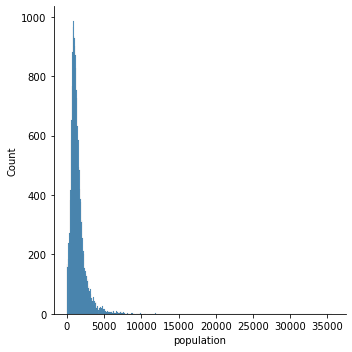

In [34]:
plt.figure(figsize= (6,4))

sns.displot(data= df, x= "population")

plt.show()

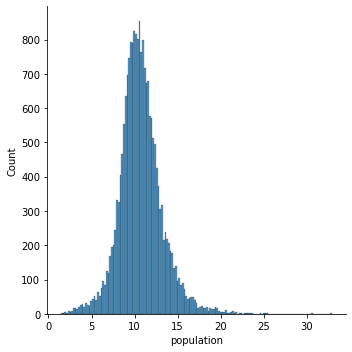

In [35]:
sns.displot(df["population"].apply(np.cbrt))

In [36]:
df["population"] = df["population"].apply(np.cbrt)

<Figure size 432x288 with 0 Axes>

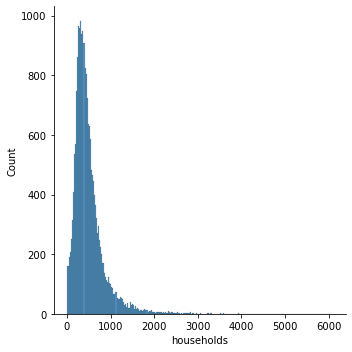

In [37]:
plt.figure(figsize= (6,4))

sns.displot(data= df, x= "households")

plt.show()

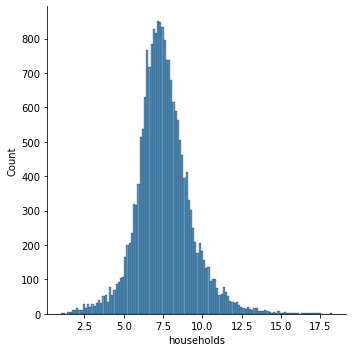

In [38]:
sns.displot(df["households"].apply(np.cbrt))

In [39]:
df["households"] = df["households"].apply(np.cbrt)

<Figure size 432x288 with 0 Axes>

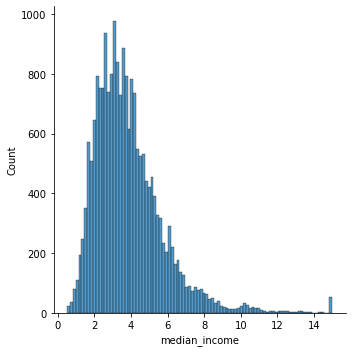

In [40]:
plt.figure(figsize= (6,4))

sns.displot(data= df, x= "median_income")

plt.show()

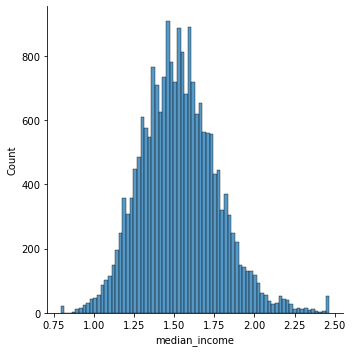

In [41]:
sns.displot(df["median_income"].apply(np.cbrt))

In [42]:
df["median_income"] = df["median_income"].apply(np.cbrt)

In [43]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,9.582840,5.052774,6.854124,5.013298,2.026741,452600,0,0,1,0
1,-122.22,37.86,21,19.219071,10.341536,13.390518,10.440327,2.024808,358500,0,0,1,0
2,-122.24,37.85,52,11.362573,5.748897,7.915783,5.614672,1.936097,352100,0,0,1,0
3,-122.25,37.85,52,10.840679,6.171006,8.232746,6.027650,1.780352,341300,0,0,1,0
4,-122.25,37.85,52,11.761495,6.542133,8.267029,6.374311,1.566789,342200,0,0,1,0


### 4) Train Test Split:

In [44]:
# Features:

x = df.drop("median_house_value", axis= 1)

In [45]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,9.582840,5.052774,6.854124,5.013298,2.026741,0,0,1,0
1,-122.22,37.86,21,19.219071,10.341536,13.390518,10.440327,2.024808,0,0,1,0
2,-122.24,37.85,52,11.362573,5.748897,7.915783,5.614672,1.936097,0,0,1,0
3,-122.25,37.85,52,10.840679,6.171006,8.232746,6.027650,1.780352,0,0,1,0
4,-122.25,37.85,52,11.761495,6.542133,8.267029,6.374311,1.566789,0,0,1,0


In [46]:
# Target:

y = df["median_house_value"]

In [47]:
y.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [49]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(16512, 12)
(16512,)
(4128, 12)
(4128,)


### 5) Scalling:

In [50]:
sc = StandardScaler()

In [51]:
temp = sc.fit_transform(x_train)
x_train = pd.DataFrame(temp, index= x_train.index, columns= x_train.columns)
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14196,1.272587,-1.372811,0.348490,0.492210,0.465566,1.016513,0.575400,-0.213299,-0.680574,-0.015566,-0.355646,2.629758
8267,0.709162,-0.876696,1.618118,0.618468,0.845375,0.103947,0.906576,0.117488,-0.680574,-0.015566,-0.355646,2.629758
17445,-0.447603,-0.460146,-1.952710,-0.236188,-0.460006,-0.401550,-0.349245,0.307291,-0.680574,-0.015566,-0.355646,2.629758
14265,1.232698,-1.382172,0.586545,-0.605351,-0.323446,0.218333,-0.274371,-1.191061,-0.680574,-0.015566,-0.355646,2.629758
2271,-0.108551,0.532084,1.142008,0.080826,-0.101248,-0.461340,-0.179819,-0.032762,1.469348,-0.015566,-0.355646,-0.380263


In [52]:
temp = sc.transform(x_test)
x_test = pd.DataFrame(temp, index= x_test.index, columns= x_test.columns)
x_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
20046,0.285347,0.195100,-0.286324,-0.534770,0.22512,0.190275,-0.258951,-1.435159,1.469348,-0.015566,-0.355646,-0.380263
3024,0.060975,-0.235491,0.110435,0.397665,0.22512,0.370838,0.469431,-0.712032,1.469348,-0.015566,-0.355646,-0.380263
15663,-1.424870,1.009478,1.856173,0.824885,0.22512,0.099429,1.352018,-0.077204,-0.680574,-0.015566,2.811787,-0.380263
20484,0.429943,-0.637999,-0.921138,0.453921,0.22512,0.507439,0.208562,1.066369,-0.680574,-0.015566,-0.355646,-0.380263
9814,-1.170581,0.457199,0.427842,0.061925,0.22512,-0.199510,-0.009308,0.067372,-0.680574,-0.015566,-0.355646,2.629758


### 6) Linear Regression:

In [53]:
linreg = LinearRegression()

In [54]:
linreg.fit(x_train, y_train)

LinearRegression()

In [55]:
pred = linreg.predict(x_test)

In [56]:
np.sqrt(mean_squared_error(y_test, pred))

71523.29753250435

In [57]:
r2_score(y_test, pred)

0.6096194260825099

### 7) Decision Tree:

In [58]:
dt = DecisionTreeRegressor()

In [59]:
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [60]:
pred = dt.predict(x_test)

In [61]:
np.sqrt(mean_squared_error(y_test, pred))

69207.76354132853

In [62]:
r2_score(y_test, pred)

0.6344870484005549

### 8) Random Forest:

In [63]:
rf = RandomForestRegressor(n_estimators= 200)

In [64]:
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200)

In [66]:
pred = rf.predict(x_test)

In [67]:
np.sqrt(mean_squared_error(y_test, pred))

48678.62828182992

In [68]:
r2_score(y_test, pred)

0.8191702826562172

### 9) Regression Model Using only median_income Feature:

In [73]:
x_train_1 = x_train[["median_income"]]

In [74]:
x_test_1 = x_test[["median_income"]]

In [75]:
linreg1 = LinearRegression()

In [76]:
linreg1.fit(x_train_1, y_train)

LinearRegression()

In [77]:
pred = linreg1.predict(x_test_1)

In [78]:
np.sqrt(mean_squared_error(y_test, pred))

85366.64519829385

In [79]:
r2_score(y_test, pred)

0.4438786490768616

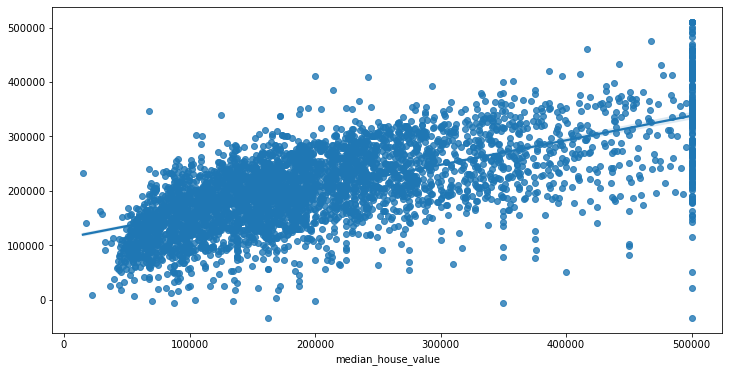

In [84]:
plt.figure(figsize= (12,6))

sns.regplot(x= y_test, y= pred, fit_reg= True)

plt.show()